# CREATING A NEW MOVIE STUDIO FOR MICROSOFT: Exploratory data analysis of movie data

## Importing necesarry data

In [3]:
import pandas as pd
import csv
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Introduction

## Problem


Microsoft wants to create a new movie studio but has 0 knowledge of the industry


## Objectives

1. To give a Microsoft a basic understanding of the industry
2. To help Microsoft explore what types of films are currently doing best
3. To give Microsoft actionable insights to create a successful movie studio


# Business Understanding

Opening a file containing data in relation to the movie industry

In [30]:
df1 = pd.read_csv("bom.movie_gross.csv.gz", compression = 'gzip')
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


## How saturated is the industry?

A count of all existing studios that have released films in the past years

In [14]:
studio_count = df1.studio.value_counts()
len(studio_count)

257

A list of the top 20 existing studios as per the numbers of films they have released in the past years according to data from 'bom.movie_gross.csv.gz'. 

In [19]:
studio_count = df1.studio.value_counts().head(20) 
studio_count

studio
IFC       166
Uni.      147
WB        140
Fox       136
Magn.     136
SPC       123
Sony      110
BV        106
LGF       103
Par.      101
Eros       89
Wein.      77
CL         74
Strand     68
FoxS       67
RAtt.      66
KL         62
Focus      60
WGUSA      58
CJ         56
Name: count, dtype: int64

A pie chart to visualize the number of films released by the top studios in the market

<Axes: ylabel='count'>

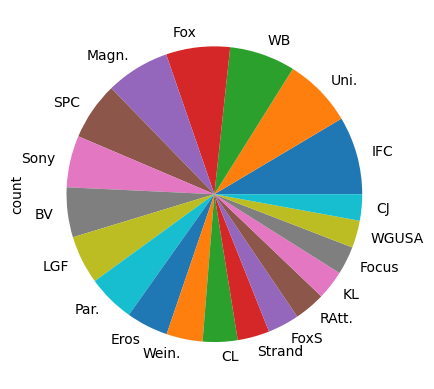

In [7]:
studio_count.plot(kind='pie')

## How fast are films coming out?

Number of films produced in the recent years

In [20]:
len(df1['title'])

3387

Number of films released per year

In [22]:
year_count = df1.year.value_counts()
year_count

year
2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: count, dtype: int64

A bar graph to show the number of films being released per year and the current trend

<Axes: xlabel='year'>

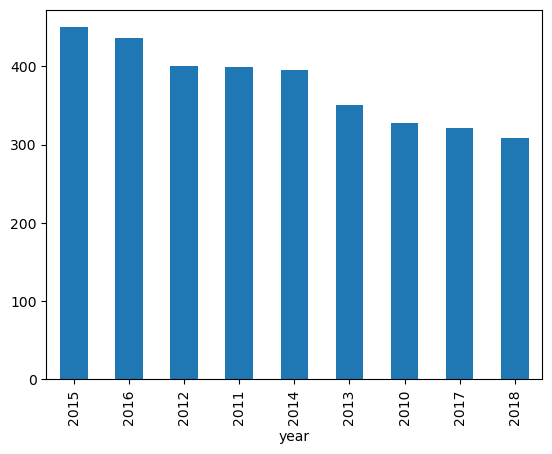

In [25]:
year_count.plot(kind='bar')





Now that we have a general view of how the movie industry looks from the outside, we shall delve into analyzing the data even more to answer questions such as:
1. What to produce?
2. When to produce?
3. Who to work with?

# Data Understanding



## Opening and reading all necessary files

In [104]:
df2 = pd.read_csv("tmdb.movies.csv.gz", compression = 'gzip')
df3 = pd.read_csv("tn.movie_budgets.csv.gz", compression = 'gzip')
df4 = pd.read_csv("rt.movie_info.tsv.gz", sep = '\t', compression = 'gzip')

## Importance of each file

a) Data frame 'df1' contains important information on:
 1. Domestic gross
 2. Foreign gross
 3. RElease year
 

This has helped us analyze the movie industry as of now and in the recent years

In [48]:
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


b)Data frame 'df2' contains important information on:
  1. Original movie titles
  2. Popularity of each movie
  3. Release dates of movies
  
These will help us answer the questions of what and when to produce

In [105]:
df2

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


c) Data frame 'df3' contains important information on:
   1. Production budget
   2. Domestic gross
   3. Worldide gross
   
These will help us answer the question of expected budget

In [28]:
df3

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


d) Data frame 'df4'contains important information on:
 1. Run times
 2. Genres
 

These will help us answer the question of what to produce

In [83]:
df4

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


## Dropping unnecessary columns

To avoid clutter and errors, we shall drop irrelevant columns from our data frames using the .drop() function

In [ ]:
df4.drop(['theater_date','box_office','dvd_date','currency','synopsis'], axis=1)

In [106]:
df2 = df2.drop(['original_title'], axis=1)
df2

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,0.600,2018-06-22,Trailer Made,0.0,1


## Creating new columns

 On 'df2', using the release date values and the datetime importation we will find out the exact relase day of the week and month of the year.

We shall then create two new columns for the 'day_of_the_week' and 'month_of_the_year'

In [108]:
df2['release_date'] = pd.to_datetime(df2['release_date'])
df2['day_of_week'] = df2['release_date'].dt.day_name()
df2['month_of_year'] = df2['release_date'].dt.month_name()
df2

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,day_of_week,month_of_year
0,0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Friday,November
1,1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Friday,March
2,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,Friday,May
3,3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,Wednesday,November
4,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,Friday,July
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1,Saturday,October
26513,26513,"[18, 53]",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,Tuesday,May
26514,26514,"[14, 28, 12]",381231,en,0.600,2018-10-01,The Last One,0.0,1,Monday,October
26515,26515,"[10751, 12, 28]",366854,en,0.600,2018-06-22,Trailer Made,0.0,1,Friday,June


## Deescribing the data

In [54]:
df1.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [67]:
df2.describe()

,Unnamed: 0,id,popularity,release_date,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,2014-06-10 02:50:14.730173184,5.991281,194.224837
min,0.00000,27.000000,0.600000,1930-04-29 00:00:00,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,2012-06-29 00:00:00,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,2014-09-19 00:00:00,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,2016-10-01 00:00:00,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,2020-12-25 00:00:00,10.000000,22186.000000
std,7654.94288,153661.615648,4.355229,NaN,1.852946,960.961095


In [56]:
df3.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [68]:
df4.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [58]:
df5.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


## Merging the data

To make our work easier we shall merge our data into one data frame

In [59]:
#Merging 'df1' and 'df3'
df1_df3 = pd.merge(df1, df3, left_on='title', right_on='movie', how='inner')
df1_df3.to_csv('merged_files.csv', index=False)
df1_df3 

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


In [89]:
#Merging 'df1_df3' with 'df4'
df1_df3_df4 = pd.merge(df1_df3, df4, on='studio', how='inner')
df1_df3_df4.to_csv('merged_files.csv', index=False)
df1_df3_df4

,title,studio,domestic_gross_x,foreign_gross,year,id_x,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,id_y,rating,genre,director,writer,runtime
0,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",611,R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,137 minutes
1,Due Date,WB,100500000.0,111200000,2010,84,"Nov 5, 2010",Due Date,"$65,000,000","$100,539,043","$211,739,043",611,R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,137 minutes
2,Yogi Bear,WB,100200000.0,101300000,2010,62,"Dec 17, 2010",Yogi Bear,"$80,000,000","$100,246,011","$204,774,690",611,R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,137 minutes
3,The Book of Eli,WB,94800000.0,62300000,2010,64,"Jan 15, 2010",The Book of Eli,"$80,000,000","$94,835,059","$158,750,817",611,R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,137 minutes
4,The Town,WB,92200000.0,61800000,2010,92,"Sep 17, 2010",The Town,"$37,000,000","$92,186,262","$152,566,881",611,R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,137 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,The Florida Project,A24,5900000.0,NaN,2017,11,"Oct 6, 2017",The Florida Project,"$2,000,000","$5,904,366","$11,295,324",1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,91 minutes
1339,Free Fire,A24,1800000.0,NaN,2017,83,"Apr 21, 2017",Free Fire,"$10,000,000","$1,799,322","$3,793,739",1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,91 minutes
1340,A Ghost Story,A24,1600000.0,NaN,2017,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798","$2,769,782",1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,91 minutes
1341,Hereditary,A24,44100000.0,35300000,2018,56,"Jun 8, 2018",Hereditary,"$10,000,000","$44,069,456","$70,133,905",1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,91 minutes


In [75]:
#Dropping repeated columns in our new merged dataframe using the .drop() function
df1_df3_df4.drop(columns = 'domestic_gross_y')

,title,studio,domestic_gross_x,foreign_gross,year,id_x,release_date,movie,production_budget,worldwide_gross,id_y,rating,genre,director,writer,runtime
0,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$835,524,642",611,R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,137 minutes
1,Due Date,WB,100500000.0,111200000,2010,84,"Nov 5, 2010",Due Date,"$65,000,000","$211,739,043",611,R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,137 minutes
2,Yogi Bear,WB,100200000.0,101300000,2010,62,"Dec 17, 2010",Yogi Bear,"$80,000,000","$204,774,690",611,R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,137 minutes
3,The Book of Eli,WB,94800000.0,62300000,2010,64,"Jan 15, 2010",The Book of Eli,"$80,000,000","$158,750,817",611,R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,137 minutes
4,The Town,WB,92200000.0,61800000,2010,92,"Sep 17, 2010",The Town,"$37,000,000","$152,566,881",611,R,Drama|Mystery and Suspense,Clint Eastwood,Brian Helgeland,137 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,The Florida Project,A24,5900000.0,NaN,2017,11,"Oct 6, 2017",The Florida Project,"$2,000,000","$11,295,324",1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,91 minutes
1339,Free Fire,A24,1800000.0,NaN,2017,83,"Apr 21, 2017",Free Fire,"$10,000,000","$3,793,739",1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,91 minutes
1340,A Ghost Story,A24,1600000.0,NaN,2017,86,"Jul 7, 2017",A Ghost Story,"$100,000","$2,769,782",1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,91 minutes
1341,Hereditary,A24,44100000.0,35300000,2018,56,"Jun 8, 2018",Hereditary,"$10,000,000","$70,133,905",1399,R,Drama|Horror,Trey Edward Shults,Trey Edward Shults,91 minutes


# Data Analysis

## 1. Top genres 

Counting the number of different genres of the movies from our data set

In [92]:
genre_count = df1_df3_df4.genre.value_counts()
len(genre_count)

254

Counting the number of movies per genre. Only the top 1o

In [93]:
genre_count = df1_df3_df4.genre.value_counts().head(10)
genre_count

genre
Drama|Mystery and Suspense                         261
Drama                                               86
Comedy|Drama                                        74
Comedy                                              57
Art House and International|Drama                   53
Action and Adventure|Drama                          29
Action and Adventure|Drama|Mystery and Suspense     28
Drama|Romance                                       26
Art House and International|Comedy|Drama            25
Horror                                              23
Name: count, dtype: int64

Plotting a pie chart to show the top genres per movie

<Axes: ylabel='count'>

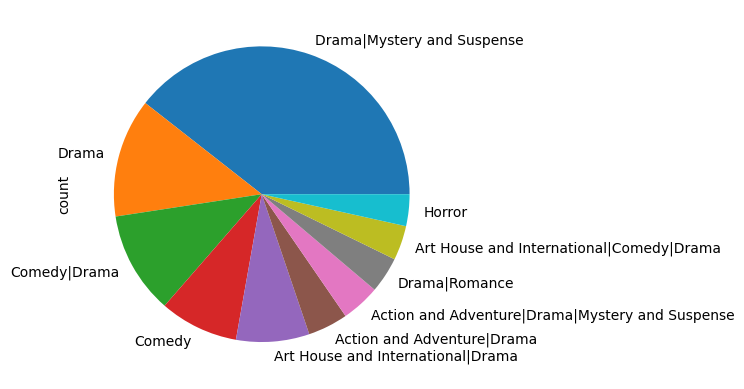

In [94]:
genre_count.plot(kind='pie')

From this we see that most released movies are from the genres:
  1. Drama|Mystrey and Suspence
  2. Drama
  3. Comedy|Drama
  4. Comedy
  4. Art House and International|Drama

## 2. Most popular day/month

Counting the number of films released on certain months

In [109]:
month_count = df2.month_of_year.value_counts()
month_count

month_of_year
January      3132
October      3035
April        2566
March        2406
November     2338
September    2264
June         2166
December     1929
May          1865
August       1698
February     1614
July         1504
Name: count, dtype: int64

Plotting a bar graph to show the number of films produced in the different months

<Axes: xlabel='month_of_year'>

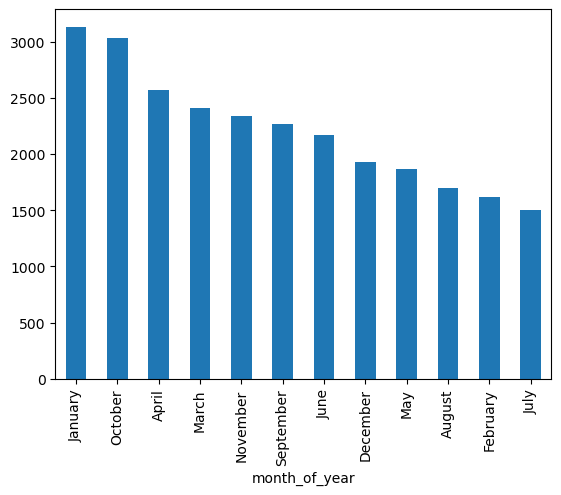

In [110]:
month_count.plot(kind='bar')

From this we see the best months to release a movie are:
1. January
2. October
3. April

Counthing the number of films released on certain days of the week

In [112]:
days_count = df2.day_of_week.value_counts()
days_count

day_of_week
Friday       9171
Tuesday      4380
Saturday     3568
Thursday     2651
Sunday       2544
Wednesday    2238
Monday       1965
Name: count, dtype: int64

Plotting a bar graph to show the number of films produced on the different days of the week

<Axes: xlabel='day_of_week'>

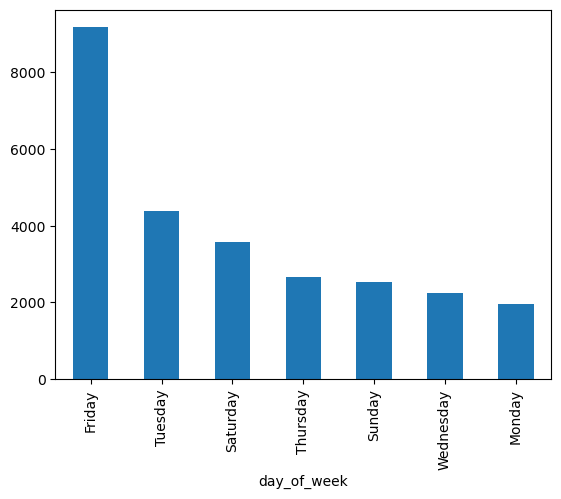

In [114]:
days_count.plot(kind='bar')

From this we see the best day to release a movie is:
1. Friday

# 3. Most popular directors and writers

Counting the number of movies directed by each director

In [123]:
director_count = df1_df3_df4.director.value_counts().head(10)
director_count 

director
Gary Wheeler          110
Clint Eastwood        107
John Krasinski         30
Trey Edward Shults     21
Steven Spielberg        5
William Beaudine        4
Jim Jarmusch            4
Alfred Hitchcock        4
George Sidney           3
Richard Linklater       3
Name: count, dtype: int64

Plotting pie chart to see the most popular director

<Axes: ylabel='count'>

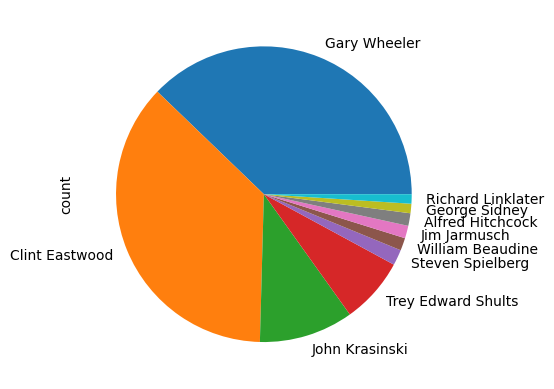

In [124]:
director_count.plot(kind='pie')

From this we see the best directors to work with are:
1. Gary Wheeler
2. Clint Eastwood

Counting the number of movies written by each writer

In [128]:
writer_count = df1_df3_df4.writer.value_counts().head(5)
writer_count 

writer
Mark Freiburger|Gary Wheeler|Robert Whitlow|Matthew Modine    110
Brian Helgeland                                               102
John Krasinski                                                 30
Trey Edward Shults                                             21
John Hughes                                                     3
Name: count, dtype: int64

Plotting a pie chart to visulaize the most popular writers

<Axes: ylabel='count'>

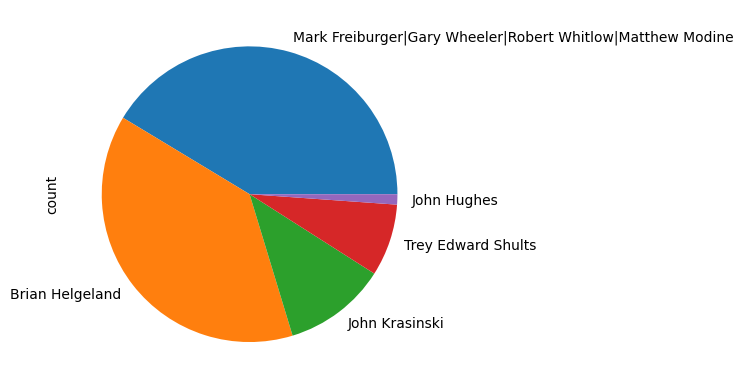

In [129]:
writer_count.plot(kind='pie')

From this we see the best writers to work with are:
1. Mark Freiburger|Gary Wheeler|Robert Whitlow|Matthew Modine 
2. Brian Helgeland

# Conclusion

We have answered our 3 main questions.

## What to produce?

The genres:
1. Drama|Mystrey and Suspence
2. Drama
3. Comedy|Drama
4. Comedy
5. Art House and International|Drama

## When to produce?

a) The months of the year to produce
1. January
2. October
3. April

b) The days of week to produce
1. Friday

## Who to work with?

a) Directors:
1. Gary Wheeler
2. Clint Eastwood

b) Writers:
1. Mark Freiburger|Gary Wheeler|Robert Whitlow|Matthew Modine
2. Brian Helgeland